In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Salaries.csv')
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape

(397, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [6]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [7]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [8]:
#Statistical summary
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


Key Observations:
    1 The mean is more than median (50th percentile) in all columns
    2 There is a large difference in 75th percentile and max in all columns
    3 The 1 and 2 observations suggest that there are extreme outliers present in these three columns

In [9]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

There are no null values in the dataset

# Data visualizations

To check the missing values

<AxesSubplot:>

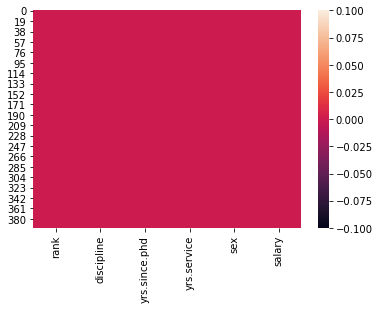

In [10]:
sns.heatmap(df.isnull())

There are no null values in the dataset

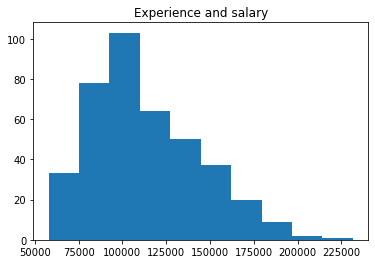

In [11]:
df["salary"].hist(grid=False)
plt.title("Experience and salary")
plt.show()

# Encoding the DataFrame

In [12]:
from sklearn.preprocessing import LabelEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


Now we have converted the string data to numerical data using ordinal encoder.

# Plotting Outliers

In [13]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

# univariate analysis

<AxesSubplot:>

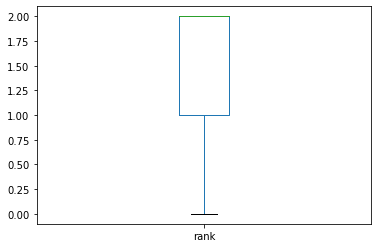

In [14]:
df['rank'].plot.box()

No outliers are present

<AxesSubplot:>

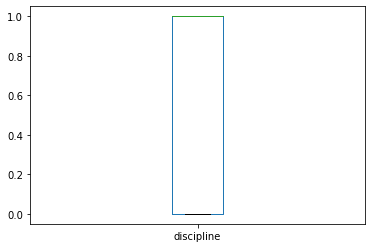

In [15]:
df['discipline'].plot.box()

No outliers are present

<AxesSubplot:>

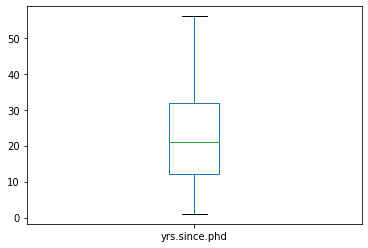

In [16]:
df['yrs.since.phd'].plot.box()

This shows there are no outliers are present

<AxesSubplot:>

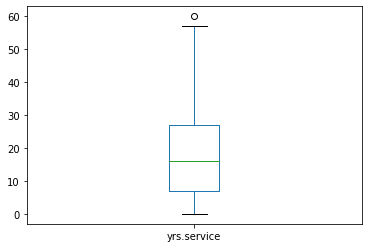

In [17]:
df['yrs.service'].plot.box()

No outliers are present

<AxesSubplot:>

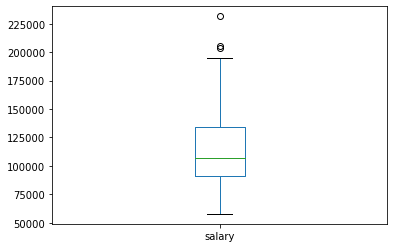

In [18]:
df['salary'].plot.box()

There are outliers present in this column

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

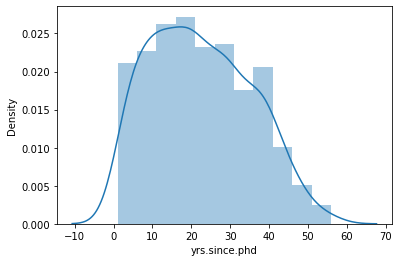

In [19]:
sns.distplot(df['yrs.since.phd'])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

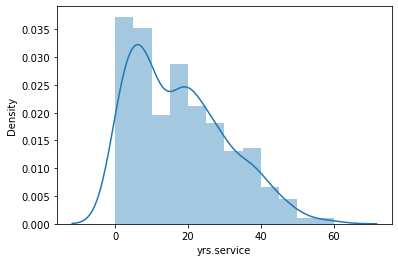

In [20]:
sns.distplot(df['yrs.service'])

<AxesSubplot:xlabel='salary', ylabel='Density'>

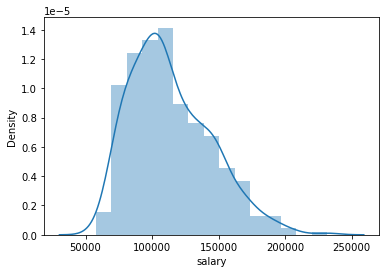

In [21]:
sns.distplot(df['salary'])

# Multivariate analysis

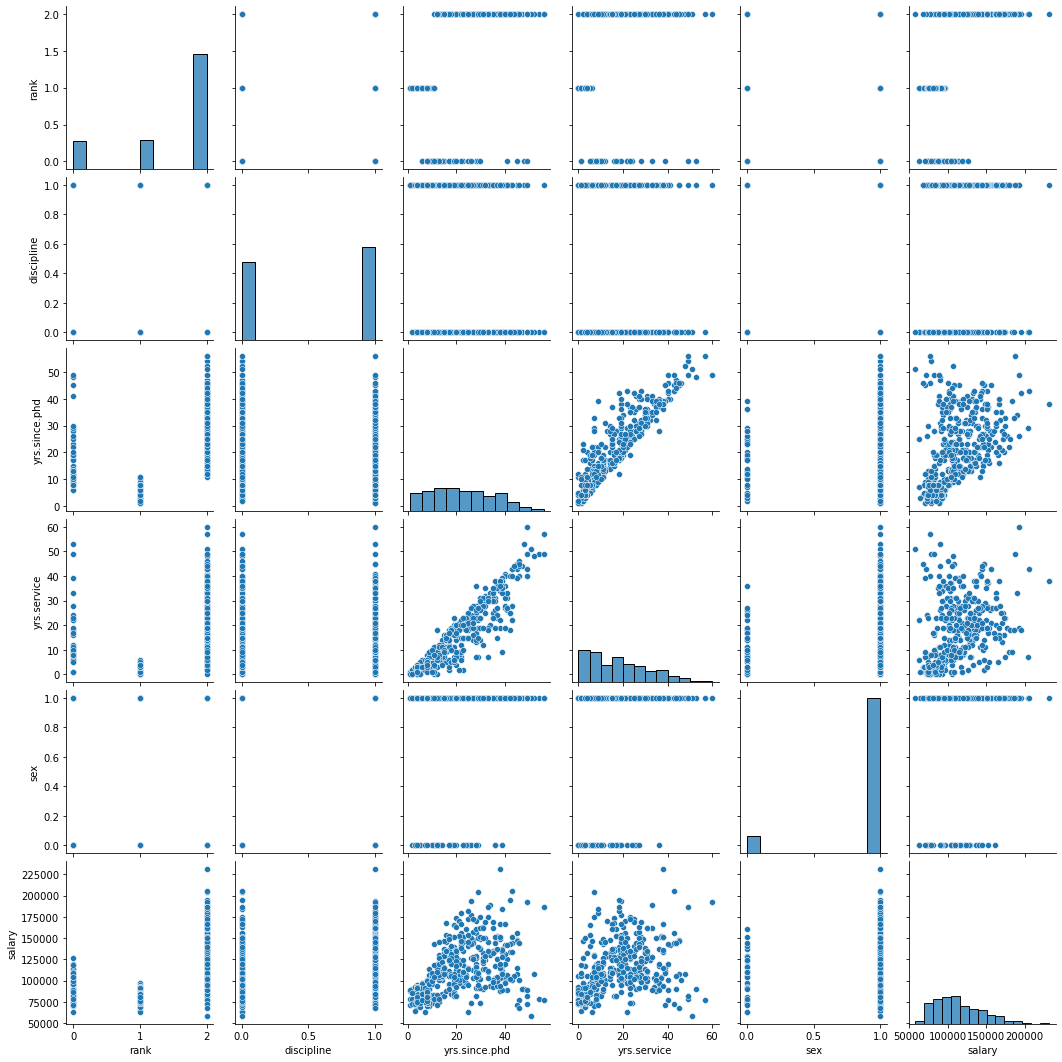

In [22]:
sns.pairplot(df)

# Correlation between the target variable and independent variables using HEAT map

In [23]:
corr=df.corr()
corr

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


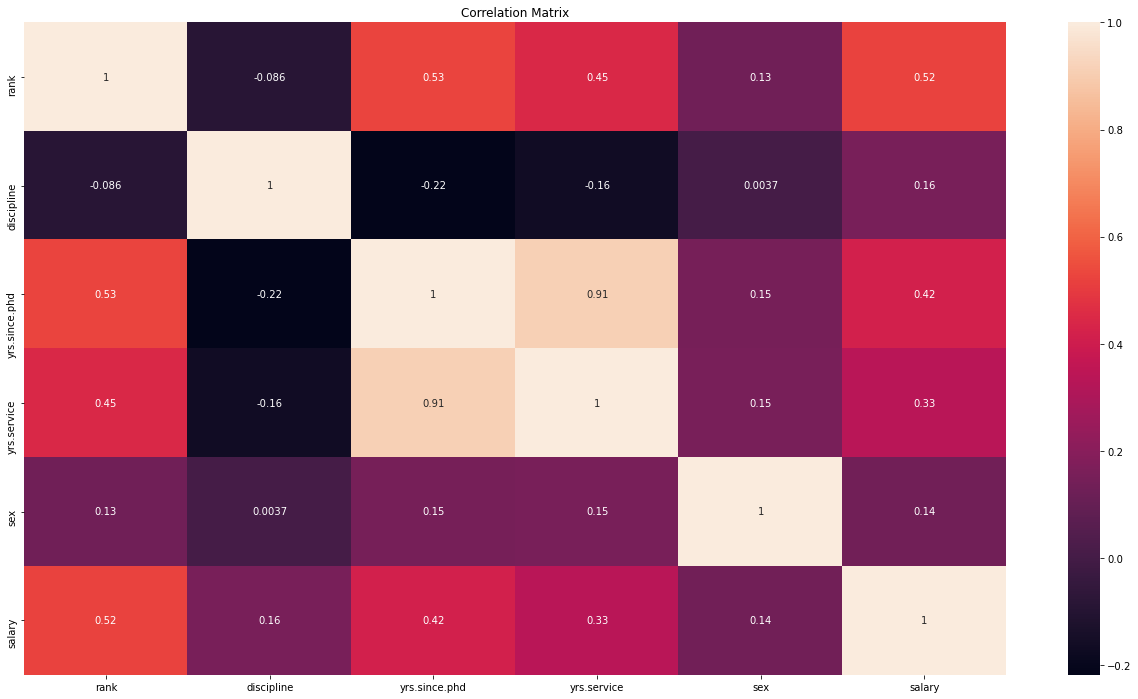

In [24]:
plt.figure(figsize=[22,12])
sns.heatmap(corr,annot=True)
plt.title("Correlation Matrix")
plt.show()

This heatmap shows the correlation matrix by visualizing the data. That is the relation between one feature vs another feature also feature vs target.

Light shades are highly correlated. 
Dark shades are very less correlated. 
Rank and years since phd are highly positively correlated with the target variable salary. 
Years service and discipline are positively correlated with the target variable salary.

# Removing outliers

In [25]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.64925739, 0.91540317, 0.25754973, 0.02966908, 0.3300584 ,
        0.86091884],
       [0.64925739, 0.91540317, 0.17985426, 0.12429986, 0.3300584 ,
        1.96667226],
       [0.67256406, 0.91540317, 1.42298184, 1.12509795, 0.3300584 ,
        1.12249537],
       ...,
       [0.64925739, 1.09241483, 1.52944617, 0.56856036, 0.3300584 ,
        0.39564018],
       [0.64925739, 1.09241483, 0.20862311, 0.20128433, 0.3300584 ,
        0.60750187],
       [0.67256406, 1.09241483, 1.11219995, 1.04811348, 0.3300584 ,
        1.08001725]])

In [26]:
threshold=3
print(np.where(z>3))

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364], dtype=int64), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
      dtype=int64))


In [27]:
df_new=df[(z<3).all(axis=1)]

In [28]:
df_new

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [29]:
df.shape

(397, 6)

In [30]:
df_new.shape

(354, 6)

This shows outliers are removed

# Checking skewness

In [31]:
df_new.skew()

rank            -1.241757
discipline      -0.182308
yrs.since.phd    0.234156
yrs.service      0.529464
sex              0.000000
salary           0.584912
dtype: float64

Here we can observe that columns are not highly skewed and these columns are in the accceptable range +0.5 or -0.5. So we need to remove only one cloumn rank.

In [32]:
df1 = df_new

In [33]:
features = ['discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary']

In [34]:
scaler = PowerTransformer(method='yeo-johnson')
'''
Parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nParameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [35]:
df_new[features] = scaler.fit_transform(df1[features].values)
df_new[features]

,discipline,yrs.since.phd,yrs.service,sex,salary
0,0.913344,-0.169933,0.213911,0.0,0.0
1,0.913344,-0.091337,0.065673,0.0,0.0
2,0.913344,-1.643434,-1.324854,0.0,0.0
3,0.913344,1.561768,1.417554,0.0,0.0
4,0.913344,1.265906,1.511111,0.0,0.0
...,...,...,...,...,...
392,-1.094878,0.827614,0.960235,0.0,0.0
393,-1.094878,0.696284,0.284763,0.0,0.0
394,-1.094878,1.385801,0.673355,0.0,0.0
395,-1.094878,0.282239,-0.012113,0.0,0.0


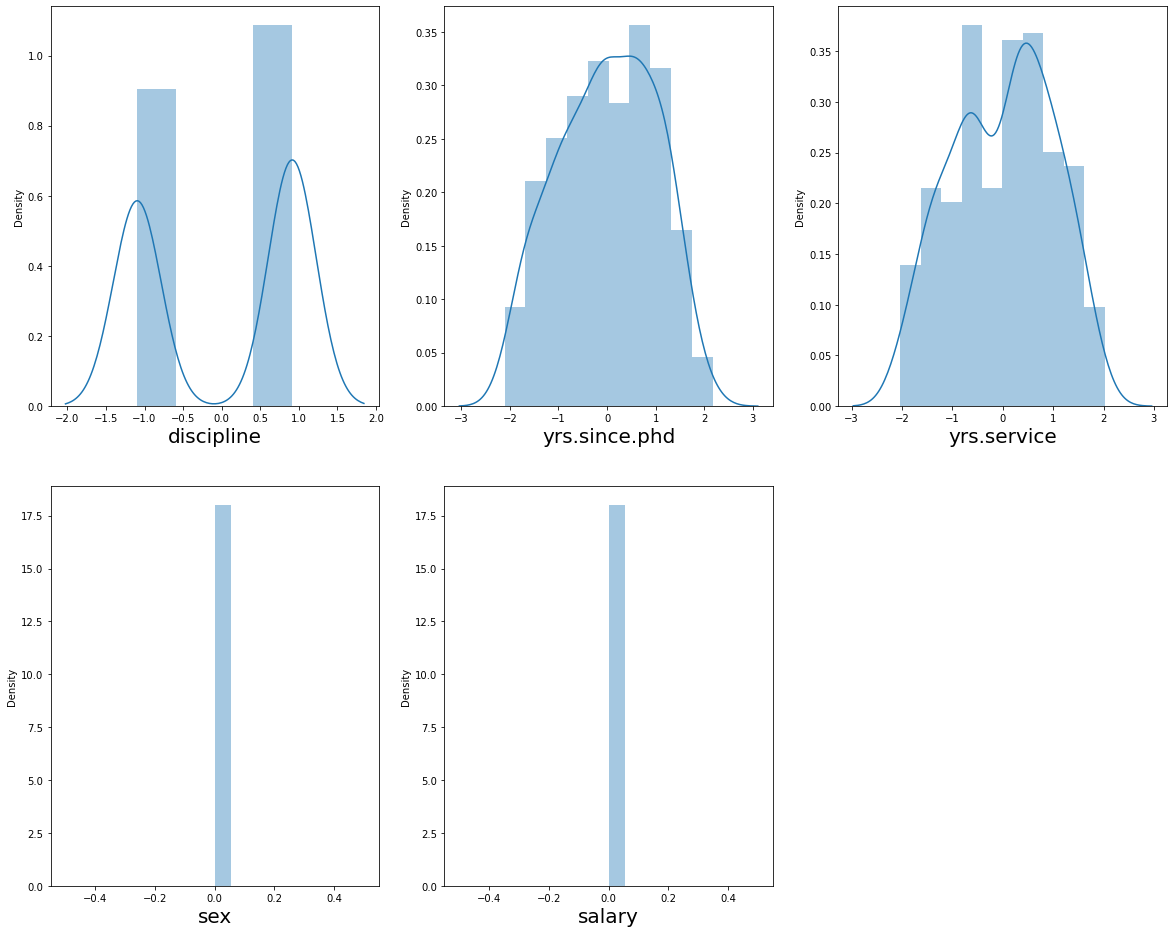

In [36]:
# After using power transformer let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df[features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

Here we can observe that the transformed data looks more normally distributed compared to previous one

# Train_test splitting

In [37]:
x = df_new.iloc[:,0:-1]
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2.0,0.913344,-0.169933,0.213911,0.0
1,2.0,0.913344,-0.091337,0.065673,0.0
2,1.0,0.913344,-1.643434,-1.324854,0.0
3,2.0,0.913344,1.561768,1.417554,0.0
4,2.0,0.913344,1.265906,1.511111,0.0
...,...,...,...,...,...
392,2.0,-1.094878,0.827614,0.960235,0.0
393,2.0,-1.094878,0.696284,0.284763,0.0
394,2.0,-1.094878,1.385801,0.673355,0.0
395,2.0,-1.094878,0.282239,-0.012113,0.0


In [38]:
y = df_new.iloc[:,-1]
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
392    0.0
393    0.0
394    0.0
395    0.0
396    0.0
Name: salary, Length: 354, dtype: float64

In [39]:
x.shape

(354, 5)

In [40]:
y.shape

(354,)

In [41]:
pd.DataFrame(data=x)

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2.0,0.913344,-0.169933,0.213911,0.0
1,2.0,0.913344,-0.091337,0.065673,0.0
2,1.0,0.913344,-1.643434,-1.324854,0.0
3,2.0,0.913344,1.561768,1.417554,0.0
4,2.0,0.913344,1.265906,1.511111,0.0
...,...,...,...,...,...
392,2.0,-1.094878,0.827614,0.960235,0.0
393,2.0,-1.094878,0.696284,0.284763,0.0
394,2.0,-1.094878,1.385801,0.673355,0.0
395,2.0,-1.094878,0.282239,-0.012113,0.0


In [42]:
pd.DataFrame(data=y)

,salary
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
392,0.0
393,0.0
394,0.0
395,0.0


In [43]:
y=y.values.reshape(-1,1)

In [44]:
y.shape

(354, 1)

In [45]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,300):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state =i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  1.0  on Random_state  1


Here we can observe test and train accuracy are same so we can use any random state since they are equal. Here I am using randon state 1.

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=1)

We have created a new train test using Random State.

# Modeling

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.naive_bayes import GaussianNB as NB

# Linear Regression

In [48]:
lr.fit(x_train,y_train)

LinearRegression()

In [49]:
pred_test=lr.predict(x_test)

In [50]:
print(r2_score(y_test,pred_test))

1.0


The accuracy of Linear Regression is 100%

In [51]:
from sklearn import metrics

# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, pred_test))
# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, pred_test))
# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

0.0
0.0
0.0


The error is zero

# Decision Tree Regressor

In [52]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_test=DTR.predict(x_test)
print(r2_score(y_test,pred_test))

1.0


The accuracy of Linear Regression is 100%

In [53]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, pred_test))
# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, pred_test))
# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

0.0
0.0
0.0


The error is zero

# Random Forest Regressor

In [54]:
RT=DecisionTreeRegressor()
RT.fit(x_train,y_train)
pred_test=RT.predict(x_test)
print(r2_score(y_test,pred_test))

1.0


The accuracy of Random Forest Regressor is 99.6%

In [55]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, pred_test))
# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, pred_test))
# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

0.0
0.0
0.0


Here also the error is zero

# SVM Regressor

In [56]:
svr=SVR()
svr.fit(x_train,y_train)
pred_test=svr.predict(x_test)
print(r2_score(y_test,pred_test))

1.0


The accuracy of SVR is 100%

In [57]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, pred_test))
# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, pred_test))
# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

0.0
0.0
0.0


Here also the error is zero

# KNN Regressor

In [58]:
knn=KNN()
knn.fit(x_train,y_train)
pred_test=knn.predict(x_test)
print(r2_score(y_test,pred_test))

1.0


The accuracy of SVR is 100%

In [59]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, pred_test))
# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, pred_test))
# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

0.0
0.0
0.0


Here also the error is zero

In the above models we can see that all models have high accuracy level as 100% so we can save any model.

# Hyper parameter tuning

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [61]:
#RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,4,6]}

In [62]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [63]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [64]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 2,
 'max_features': 'auto',
 'n_estimators': 200}

In [65]:
Final_mod = RandomForestRegressor(criterion='mae', max_depth=6, max_features='auto', n_estimators=200)
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

100.0


The model gives 100% accuracy which is very good.

# Saving the model

In [66]:
import joblib
joblib.dump(Final_mod,"salaryFinalModel.pkl")

['salaryFinalModel.pkl']

The model is saved as ['salaryFinalModel.pkl']